In [1]:
# Importing essential libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

# Print dataset shapes
print("Training data shape :",x_train.shape)
print("Testing data shape:", x_test.shape)



Training data shape : (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [13]:
# Normalize pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional layer + pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Another convolutional layer + pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Helps prevent overfitting
model.add(Dense(10, activation='softmax'))  # 10 classes

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.2610 - loss: 1.9865 - val_accuracy: 0.4936 - val_loss: 1.4380
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.4271 - loss: 1.5570 - val_accuracy: 0.5513 - val_loss: 1.2744
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4796 - loss: 1.4256 - val_accuracy: 0.5889 - val_loss: 1.1835
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5117 - loss: 1.3468 - val_accuracy: 0.6215 - val_loss: 1.1158
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5371 - loss: 1.2788 - val_accuracy: 0.6188 - val_loss: 1.1078
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.5428 - loss: 1.2538 - val_accuracy: 0.6377 - val_loss: 1.0598
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5618 - loss: 1.2087 - val_accuracy: 0.6386 - val_loss: 1.0411
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.5807 - loss: 1.1768 - 

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc*100:.2f}%')

313/313 - 1s - 3ms/step - accuracy: 0.6683 - loss: 0.9564

Test accuracy: 66.83%


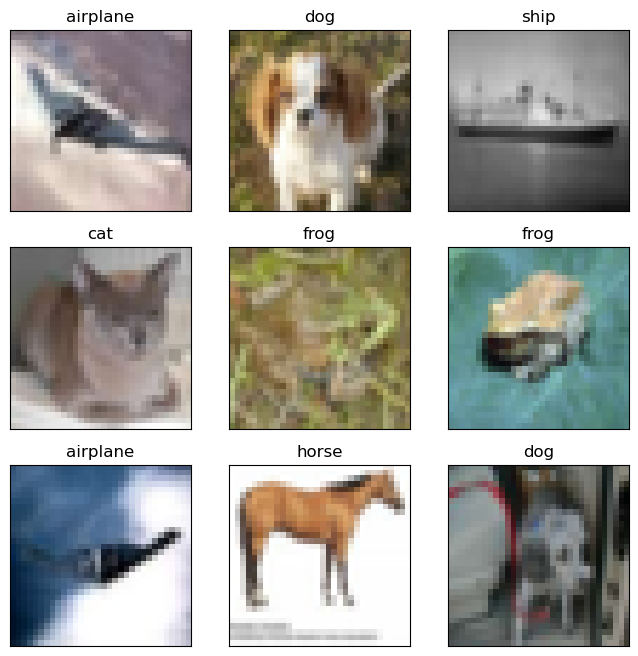

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 9 random images
plt.figure(figsize=(8,8))
for i in range(9):
    idx = np.random.randint(0, x_train.shape[0])  # Random index
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx])
    # Show the class label
    plt.title(class_names[y_train[idx].argmax() if y_train.ndim==2 else y_train[idx][0]])
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


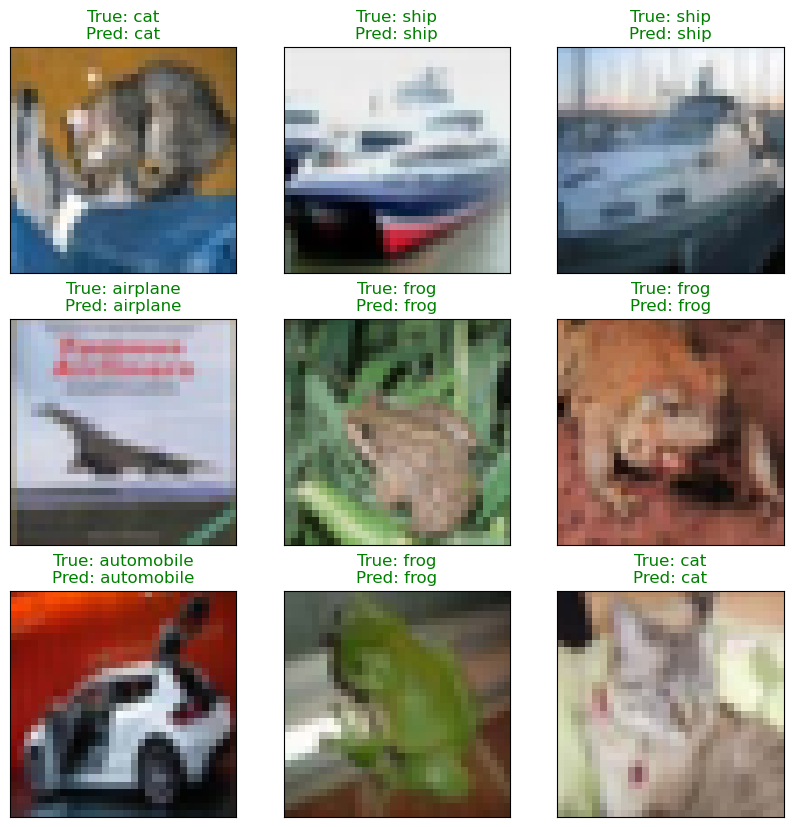

In [21]:
# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = np.argmax(y_test, axis=1)

# Plot some test images with predictions
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    # True and predicted labels
    true_label = class_names[y_true[i]]
    pred_label = class_names[y_pred_classes[i]]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=color)
plt.show()